In [2]:
from nuscenes import NuScenes

nusc = NuScenes(version='v1.0-trainval', dataroot='../nuscenes', verbose=True)


Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 17.841 seconds.
Reverse indexing ...
Done reverse indexing in 4.4 seconds.


In [4]:
from matplotlib.patches import Rectangle
Rectangle(xy=(0,0), width=10, height=10, angle=0.0, rotation_point='xy')

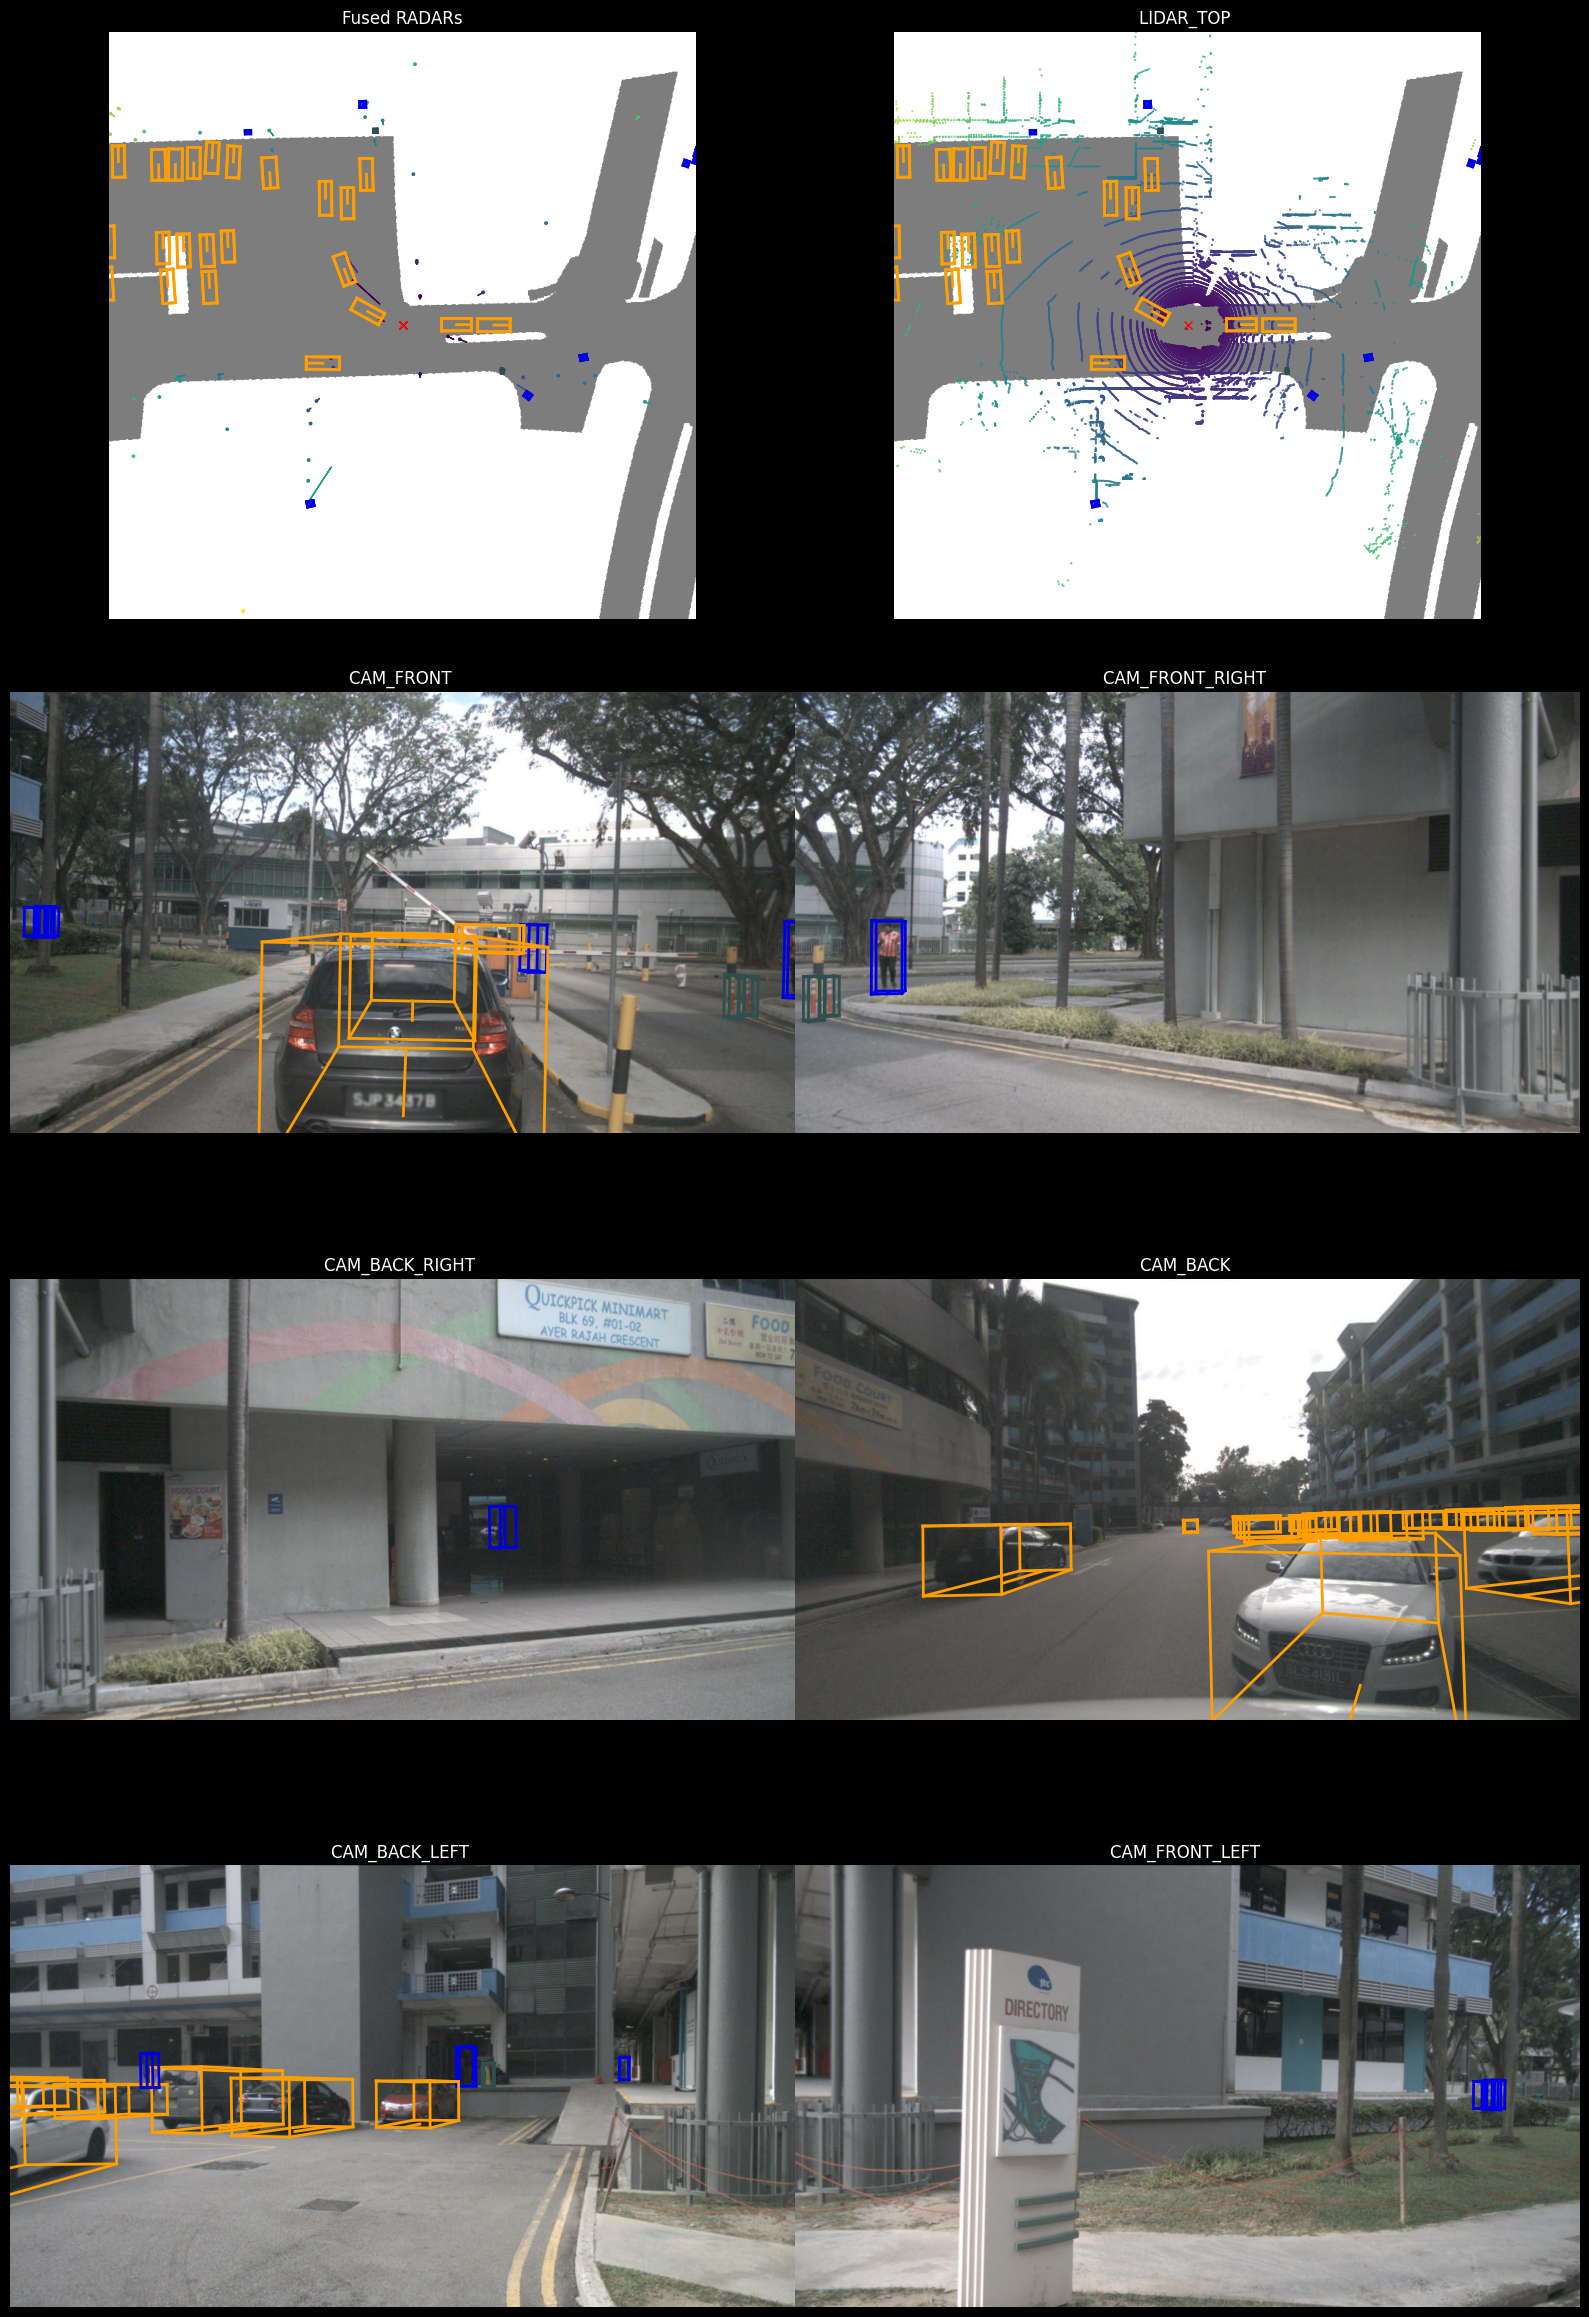

In [45]:
nusc.render_sample('fd8420396768425eabec9bdddf7e64b6')

In [36]:
# import quaternion to euler angle from scipy
angles = []
from scipy.spatial.transform import Rotation as R
anns = nusc.get('sample', "2f92c83f32aa410b93d58ea9948aba74")['anns']
count = 0
for ann in anns:
    entry = nusc.get('sample_annotation', ann)
    # if entry['category_name'] != 'vehicle.car' or entry['num_lidar_pts'] == 0 or entry['num_radar_pts'] == 0:
    #     continue
    # convert quaternion to euler angle
    r = R.from_quat(entry['rotation'], scalar_first=True)
    angles.append(r.as_euler('xyz', degrees=False)[-1])
    print(r.as_euler('xyz', degrees=False))
    count += 1
print(count)


[0.       0.       2.345356]
[ 0.          0.         -0.36379897]
[0.         0.         2.41050914]
[0.         0.         1.09828299]
[ 0.         0.        -0.5061265]
[0.         0.         2.42796243]
[ 0.          0.         -0.80693553]
[ 0.         0.        -0.6769085]
[ 0.          0.         -0.84618798]
[ 0.          0.         -0.66730919]
[ 0.          0.         -0.78162825]
[ 0.          0.         -0.73281139]
[ 0.          0.         -0.72523666]
[0.         0.         2.51955731]
[ 0.          0.         -0.68988155]
[ 0.          0.         -0.77487383]
[ 0.          0.         -0.78188708]
[0.         0.         2.41050914]
[0.         0.         1.06191068]
[0.         0.         2.39305584]
[0.         0.         2.67251677]
[ 0.          0.         -2.47872515]
[ 0.         0.        -0.7085506]
[ 0.          0.         -0.70040063]
[ 0.          0.         -0.01758338]
[ 0.          0.         -0.84618798]
[ 0.          0.         -0.04405211]
[0.         0.  

In [40]:
nusc.get_box(anns[0])


label: nan, score: nan, xyz: [784.95, 1484.01, 1.05], wlh: [0.54, 0.61, 2.00], rot axis: [0.00, 0.00, 1.00], ang(degrees): 134.38, ang(rad): 2.35, vel: nan, nan, nan, name: human.pedestrian.adult, token: 5d746ada33714f6fb9908927e8f883e8

In [1]:
# Loop through all sample_data and verify if LIDAR_TOP file exists
import os
from tqdm import tqdm
count = 0
for sample in tqdm(nusc.sample):
    lidar_token = sample['data']['LIDAR_TOP']
    lidar_path = nusc.get_sample_data_path(lidar_token)
    # try to open the file
    if not os.path.exists(lidar_path):
        count += 1
        print(f"File {lidar_path} does not exist")
        continue
print(f"{count} files do not exist")

NameError: name 'nusc' is not defined

In [8]:
import pickle
import json

# Load the Pickle file
with open('/home/vxm240030/CenterPoint/work_dirs/nusc_centerpoint_pp_02voxel_two_pfn_10sweep/train/version_12/prediction.pkl', 'rb') as f:
    data = pickle.load(f)

# Convert the data to JSON format and save to a JSON file
x = {}
x['results'] = data
with open('/home/vxm240030/CenterPoint/work_dirs/nusc_centerpoint_pp_02voxel_two_pfn_10sweep/train/version_12/prediction.json', 'w') as f:
    json.dump(x, f)

# x['results'][0]
